In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
drugdata = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID", how="outer")

# Display the data table for preview
drugdata.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_sizes = drugdata.groupby(["Drug", "Timepoint"]).agg({"Tumor Volume (mm3)": "mean"}).reset_index()
# Preview DataFrame
tumor_sizes.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sizes_se = drugdata[["Drug", "Timepoint", "Tumor Volume (mm3)"]]\
    .groupby(["Drug", "Timepoint"])\
    .sem().reset_index()
# Preview DataFrame
tumor_sizes_se.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_sizes_reformat = drugdata.groupby(["Timepoint", "Drug"]).agg({"Tumor Volume (mm3)": "mean"}).reset_index()\
    .pivot(values='Tumor Volume (mm3)', index='Timepoint', columns='Drug')
# Preview that Reformatting worked
tumor_sizes_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


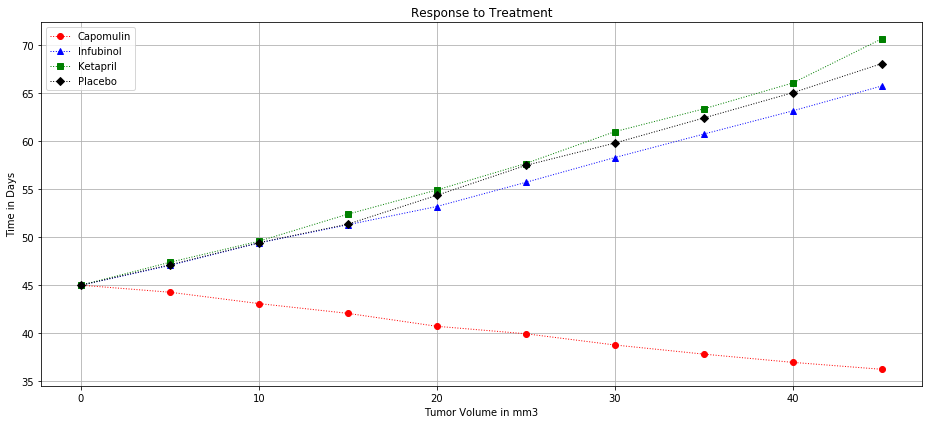

In [7]:
# Generate the Plot (with Error Bars)
x_axis = tumor_sizes_reformat.index.values

plt.figure(figsize=(13,6))
plt.plot(x_axis, tumor_sizes_reformat["Capomulin"], linestyle=':', linewidth=1, marker="o", color="red", label="Capomulin")
plt.plot(x_axis, tumor_sizes_reformat["Infubinol"], linestyle=':', linewidth=1, marker="^", color="blue", label="Infubinol")
plt.plot(x_axis, tumor_sizes_reformat["Ketapril"], linestyle=':', linewidth=1, marker="s", color="green", label="Ketapril")
plt.plot(x_axis, tumor_sizes_reformat["Placebo"], linestyle=':', linewidth=1, marker="D", color="black", label="Placebo")

plt.grid()
plt.legend(loc="best")
plt.title("Response to Treatment")
plt.xlabel("Tumor Volume in mm3")
plt.ylabel("Time in Days")
plt.tight_layout()
# Save the Figure
plt.savefig("Response.png")

In [8]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_meta_site = drugdata.groupby(["Drug", "Timepoint"]).agg({"Metastatic Sites": "mean"})
# Preview DataFrame
mean_meta_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standarderror_meta_site = drugdata[["Drug", "Timepoint", "Metastatic Sites"]]\
    .groupby(["Drug", "Timepoint"]).sem()
# Preview DataFrame
standarderror_meta_site.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
meta_site_reformat = drugdata.groupby(["Timepoint", "Drug"]).agg({"Metastatic Sites": "mean"}).reset_index()\
    .pivot(values='Metastatic Sites', index='Timepoint', columns='Drug')

# Preview that Reformatting worked
meta_site_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


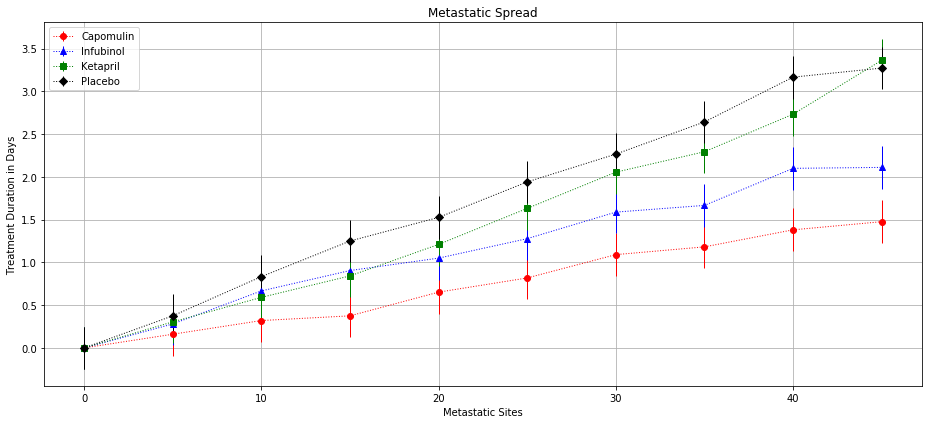

In [12]:
# Generate the Plot (with Error Bars)
plt.figure(figsize=(13,6))
plt.errorbar(x_axis, meta_site_reformat["Capomulin"], yerr=0.25, linestyle=':', linewidth=1, \
             marker="o", color="red", label="Capomulin")
plt.errorbar(x_axis, meta_site_reformat["Infubinol"], yerr=0.25, linestyle=':', linewidth=1, \
             marker="^", color="blue", label="Infubinol")
plt.errorbar(x_axis, meta_site_reformat["Ketapril"], yerr=0.25, linestyle=':', linewidth=1, \
             marker="s", color="green", label="Ketapril")
plt.errorbar(x_axis, meta_site_reformat["Placebo"], yerr=0.25, linestyle=':', linewidth=1, \
             marker="D", color="black", label="Placebo")

plt.grid()
plt.legend(loc="best")
plt.title("Metastatic Spread")
plt.xlabel("Metastatic Sites")
plt.ylabel("Treatment Duration in Days")
plt.tight_layout()
# Save the Figure
plt.savefig("MetastaticSpread.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rate = drugdata.groupby(["Drug", "Timepoint"]).agg({"Mouse ID": "nunique"})\
    .rename(columns={"Mouse ID": "Mouse Count"}).reset_index()
# Preview DataFrame
survival_rate.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
survival_rate_reformat = drugdata.groupby(["Timepoint", "Drug"]).agg({"Mouse ID": "nunique"}).reset_index()\
    .pivot(values='Mouse ID', index='Timepoint', columns='Drug')
# Preview the Data Frame
survival_rate_reformat.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


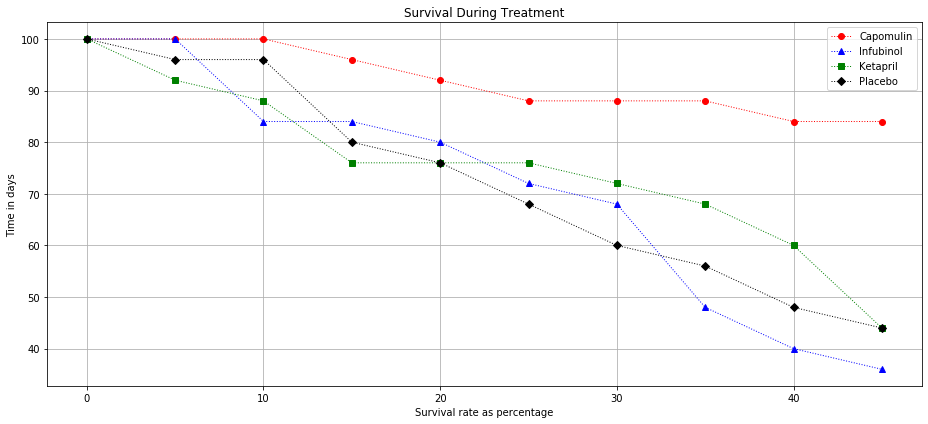

In [15]:
# Generate the Plot (Accounting for percentages)
surv_rate_percentage = (survival_rate_reformat / 25) * 100
surv_rate_percentage

plt.figure(figsize=(13,6))
plt.plot(x_axis, surv_rate_percentage["Capomulin"], linestyle=':', linewidth=1, \
             marker="o", color="red", label="Capomulin")
plt.plot(x_axis, surv_rate_percentage["Infubinol"], linestyle=':', linewidth=1, \
             marker="^", color="blue", label="Infubinol")
plt.plot(x_axis, surv_rate_percentage["Ketapril"], linestyle=':', linewidth=1, \
             marker="s", color="green", label="Ketapril")
plt.plot(x_axis, surv_rate_percentage["Placebo"], linestyle=':', linewidth=1, \
             marker="D", color="black", label="Placebo")

plt.grid()
plt.legend(loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Survival rate as percentage")
plt.ylabel("Time in days")
plt.tight_layout()
# Save the Figure
plt.savefig("SurvivalRatesPercentage.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug
percent_change = drugdata.groupby(["Timepoint", "Drug"]).agg({"Tumor Volume (mm3)": "mean"}).reset_index()\
    .pivot(values='Tumor Volume (mm3)', index='Drug', columns='Timepoint')\
    .pct_change(axis='columns', periods=9)
percent_change = percent_change[45]*100

# Display the data to confirm
percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
Name: 45, dtype: float64

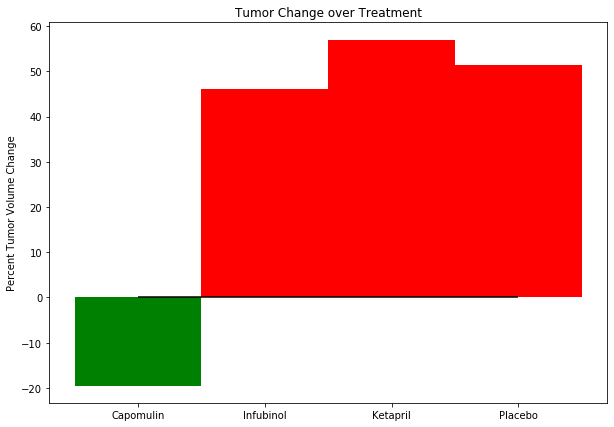

In [18]:
# Splice the data between passing and failing drugs
percent_change_plot = percent_change.loc[percent_change.index.isin(["Capomulin","Infubinol","Ketapril","Placebo"])]

# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize=(10,7))
colors = np.where(percent_change_plot.values <= 0, 'green', 'red')
bar_lst = plt.bar(percent_change_plot.index,percent_change_plot.values, width=1.00, color=colors)
plt.hlines(0,0,3)
plt.ylabel('Percent Tumor Volume Change')
plt.title('Tumor Change over Treatment')

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig("SummaryBarGraph.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)